1, 2, 13
extra: 14, 16

### 1

Using a little bit of algebra, prove that (4.2) is equivalent to (4.3). In
other words, the logistic function representation and logit representation for the logistic regression model are equivalent.

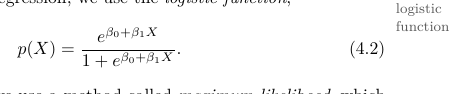
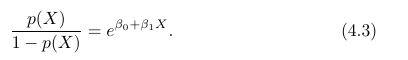

- (4.2) $p(X) = \frac{e^{\beta_0 + \beta_1X}}{1 + e^{\beta_0 + \beta_1X}}$
- (4.3) $\frac{p(X)}{1 - p(X)} = e^{\beta_0 + \beta_1X}$

We can start by defining $p(X)$ to be:

$p(X) = \frac{e^{\beta_0 + \beta_1X}}{1 + e^{\beta_0 + \beta_1X}}$

Then, we can divide both sides by $1 - p(X)$:

$\frac{p(X)}{1 - p(X)} = \frac{\frac{e^{\beta_0 + \beta_1X}}{1 + e^{\beta_0 + \beta_1X}}}{1 - \frac{e^{\beta_0 + \beta_1X}}{1 + e^{\beta_0 + \beta_1X}}}$
$= \frac{e^{\beta_0 + \beta_1X}}{1 + e^{\beta_0 + \beta_1X}} \cdot \frac{1 + e^{\beta_0 + \beta_1X}}{1 - e^{\beta_0 + \beta_1X}}$
$= \frac{e^{\beta_0 + \beta_1X}}{1 - e^{\beta_0 + \beta_1X}}$

Finally, we can use the fact that $e^{\ln(x)} = x$ to simplify the right-hand side:

$\frac{p(X)}{1 - p(X)} = \frac{e^{\beta_0 + \beta_1X}}{1 - e^{\beta_0 + \beta_1X}}$
$= e^{\beta_0 + \beta_1X}$
$= \frac{p(X)}{1 - p(X)}$

So, we have shown that (4.2) and (4.3) are equivalent.

### 2

It was stated in the text that classifying an observation to the class
for which (4.17) is largest is equivalent to classifying an observation
to the class for which (4.18) is largest. Prove that this is the case. In
other words, under the assumption that the observations in the kth
class are drawn from a N ($\mu_k , \sigma^2$) distribution, the Bayes classifier assigns an observation to the class for which the discriminant function is maximized.

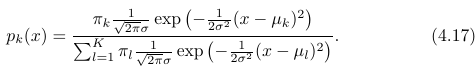
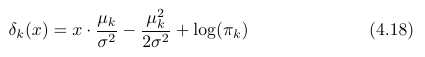

- (4.17) $p_k(x) = \frac{\pi_k \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{1}{2\sigma^2}(x - \mu_k)^2}}{\sum_{l=1}^K \pi_l \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{1}{2\sigma^2}(x - \mu_l)^2}}$
- (4.18) $\delta_k(x) = x \cdot \frac{\mu_k}{\sigma^2} - \frac{\mu_k^2}{2\sigma^2} + \log(\pi_k)$

We will show that (4.17) and (4.18) are equivalent by showing that the class for which (4.17) is largest is the same as the class for which (4.18) is largest.

We first start with (4.17). We can simplify the expression by cancelling the common terms in the numerator and denominator ($\frac{1}{\sqrt{2\pi\sigma^2}}$):

$p_k(x) = \frac{\pi_k e^{-\frac{1}{2\sigma^2}(x - \mu_k)^2}}{\sum_{l=1}^K \pi_l e^{-\frac{1}{2\sigma^2}(x - \mu_l)^2}}$

Then we take the log of the expression (log is a monotonic function, so the class for which (4.17) is largest is the same as the class for which $\log(p_k(x))$ is largest):

$\log(p_k(x)) = \log(\pi_k e^{-\frac{1}{2\sigma^2}(x - \mu_k)^2}) - \log(\sum_{l=1}^K \pi_l e^{-\frac{1}{2\sigma^2}(x - \mu_l)^2})$

Note that the second part of the expression is the same for all classes (does not vary with k)

Therefore, $p_k(x)$ is maximized when $\log(\pi_k e^{-\frac{1}{2\sigma^2}(x - \mu_k)^2})$ is maximized.

$\log(\pi_k e^{-\frac{1}{2\sigma^2}(x - \mu_k)^2})$ = $\log(\pi_k) + (-\frac{1}{2\sigma^2}(x - \mu_k)^2)$

We can then expand the square in the second term:

$\log(\pi_k) + (-\frac{1}{2\sigma^2}(x - \mu_k)^2)$ = $\log(\pi_k) + (-\frac{1}{2\sigma^2}(x^2 + {\mu_k^2} - 2x{\mu_k}))$

Mutiply out the second term (also cancelling the 2 in the last fraction):

$\log(\pi_k) + (-\frac{1}{2\sigma^2}(x^2 + {\mu_k^2} - 2x{\mu_k}))$ = $\log(\pi_k) + (-\frac{1}{2\sigma^2}x^2 - \frac{1}{2\sigma^2}{\mu_k^2} + \frac{1}{\sigma^2}x{\mu_k})$

We can then rearrange the terms (also removing $\frac{x^2}{2\sigma^2}$ since it does not depend on k):

$\log(\pi_k) + (-\frac{1}{2\sigma^2}x^2 - \frac{1}{2\sigma^2}{\mu_k^2} + \frac{1}{\sigma^2}x{\mu_k})$ = $x \cdot \frac{\mu_k}{\sigma^2} - \frac{\mu_k^2}{2\sigma^2} + \log(\pi_k)$

This is the same as (4.18), so we have shown that (4.17) and (4.18) are equivalent.

### 13

In [1]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize)
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import \
     (LinearDiscriminantAnalysis as LDA,
      QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

This question should be answered using the Weekly data set, which
is part of the ISLP package. This data is similar in nature to the
Smarket data from this chapter’s lab, except that it contains 1,089
weekly returns for 21 years, from the beginning of 1990 to the end of
2010.

In [2]:
weekly_market = load_data('Weekly')
weekly_market

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up
...,...,...,...,...,...,...,...,...,...
1084,2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969,Up
1085,2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281,Up
1086,2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283,Up
1087,2010,0.283,1.281,2.969,-0.861,0.043,4.454044,1.034,Up


- (a) Produce some numerical and graphical summaries of the Weekly data. Do there appear to be any patterns?

In [3]:
weekly_market.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,-0.032289,-0.033390,-0.030006,-0.031128,-0.030519,0.841942,-0.032460
Lag1,-0.032289,1.000000,-0.074853,0.058636,-0.071274,-0.008183,-0.064951,-0.075032
Lag2,-0.033390,-0.074853,1.000000,-0.075721,0.058382,-0.072499,-0.085513,0.059167
Lag3,-0.030006,0.058636,-0.075721,1.000000,-0.075396,0.060657,-0.069288,-0.071244
Lag4,-0.031128,-0.071274,0.058382,-0.075396,1.000000,-0.075675,-0.061075,-0.007826
Lag5,-0.030519,-0.008183,-0.072499,0.060657,-0.075675,1.000000,-0.058517,0.011013
Volume,0.841942,-0.064951,-0.085513,-0.069288,-0.061075,-0.058517,1.000000,-0.033078
Today,-0.032460,-0.075032,0.059167,-0.071244,-0.007826,0.011013,-0.033078,1.000000


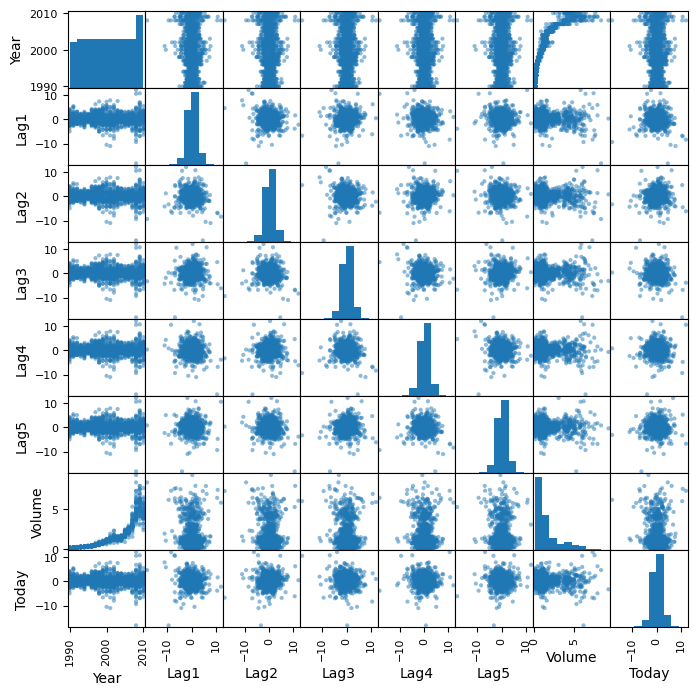

In [4]:
pd.plotting.scatter_matrix(weekly_market, figsize=(8, 8));

It appears the only strong correlation is between the year and the volume. The year is increasing and the volume is also increasing. The other variables do not appear to have any strong correlation.

- (b) Use the full data set to perform a logistic regression with Direction as the response and the five lag variables plus Volume as predictors. Use the summary function to print the results. Do any of the predictors appear to be statistically significant? If so, which ones?

In [5]:
allvars = weekly_market.columns.drop(['Today', 'Direction', 'Year'])
design = MS(allvars)
X = design.fit_transform(weekly_market)
y = weekly_market.Direction.map({'Up': 1, 'Down': 0})
glm = sm.GLM(y,
             X,
             family=sm.families.Binomial())
results = glm.fit()
summarize(results)

,coef,std err,z,P>|z|
intercept,0.2669,0.086,3.106,0.002
Lag1,-0.0413,0.026,-1.563,0.118
Lag2,0.0584,0.027,2.175,0.030
Lag3,-0.0161,0.027,-0.602,0.547
Lag4,-0.0278,0.026,-1.050,0.294
Lag5,-0.0145,0.026,-0.549,0.583
Volume,-0.0227,0.037,-0.616,0.538


- (c) Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.

In [6]:
# confusion matrix
yhat = (results.fittedvalues > 0.5).astype(int)
confusion_table(y, yhat)

Truth,0,1
Predicted,,
0,54,430
1,48,557


The confusion matrix above shows a lot of false negatives.  This is a Type II error, which is when the model predicts the market will go down, but it actually goes up.  The model is not very good at predicting when the market will go down.

In [7]:
# fraction of correct predictions
np.mean(y == yhat) # (54 + 557) / (54 + 430 + 48 + 557)

0.5610651974288338

- (d) Now fit the logistic regression model using a training data period from 1990 to 2008, with Lag2 as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010).

In [37]:
allvars = weekly_market.columns.drop(['Today', 'Direction', 'Year'])
design = MS(allvars)
# hold out data from 2009 and 2010 for testing
train = weekly_market.Year < 2009
X_train = design.fit_transform(weekly_market[train])
y_train = weekly_market.Direction[train].map({'Up': 1, 'Down': 0})
X_test = design.fit_transform(weekly_market[~train])
y_test = weekly_market.Direction[~train].map({'Up': 1, 'Down': 0})
glm = sm.GLM(y_train, X_train, family=sm.families.Binomial())
results = glm.fit()
# test set predictions
yhat = (results.predict(X_test) > 0.5).astype(int)
confusion_table(y_test, yhat), np.mean(y_test == yhat)

(Truth       0   1
 Predicted        
 0          31  12
 1          44  17,
 0.46153846153846156)

- (e) Repeat (d) using LDA.

In [43]:
lda = LDA()
lda.fit(X_train, y_train)
yhat = lda.predict(X_test)
confusion_table(y_test, yhat), np.mean(y_test == yhat)

(Truth       0   1
 Predicted        
 0          31  12
 1          44  17,
 0.46153846153846156)

- (f) Repeat (d) using QDA.

In [22]:
qda = QDA(store_covariance=True)
qda.fit(X_train, y_train)
yhat = qda.predict(X_test)
confusion_table(y_test, yhat), np.mean(y_test == yhat)

/home/jake/miniconda3/envs/mathenv/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/jake/miniconda3/envs/mathenv/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:960: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/home/jake/miniconda3/envs/mathenv/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:960: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/home/jake/miniconda3/envs/mathenv/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:963: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])


(Truth       0  1
 Predicted       
 0          43  0
 1          61  0,
 0.41346153846153844)

- (g) Repeat (d) using KNN with K = 1.

In [23]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
yhat = knn.predict(X_test)
confusion_table(y_test, yhat), np.mean(y_test == yhat)

(Truth       0   1
 Predicted        
 0          21  22
 1          32  29,
 0.4807692307692308)

- (h) Reapeat (d) using naive Bayes.

In [24]:
nb = GaussianNB()
nb.fit(X_train, y_train)
yhat = nb.predict(X_test)
confusion_table(y_test, yhat), np.mean(y_test == yhat)

(Truth       0  1
 Predicted       
 0          42  1
 1          56  5,
 0.4519230769230769)

- (i) Which of these methods appears to provide the best results on this data?

It appears that KNN with K = 1 provides the best results on this data, with LDA and Logistic Regression tied for second.

- (j) Experiment with different combinations of predictors, including possible transformations and interactions, for each of the methods. Report the variables, method, and associated confusion matrix that appears to provide the best results on the held out data. Note that you should also experiment with values for K in the KNN classifier.

In [82]:
# permutations of predictors
from itertools import combinations
predictors = list(allvars)
best_acc = {'LDA': 0, 'QDA': 0, 'NB': 0, 'KNN': 0, 'LR': 0}
best_models = {'LDA': None, 'QDA': None, 'NB': None, 'KNN': None, 'LR': None}
# scale data
scaler = StandardScaler()
weekly_market[predictors] = scaler.fit_transform(weekly_market[predictors])
# ignore warnings
import warnings
warnings.filterwarnings('ignore')
for n in range(1, len(predictors) + 1):
    for combo in combinations(predictors, n):
        design = MS(combo)
        X_train = design.fit_transform(weekly_market[train])
        X_test = design.fit_transform(weekly_market[~train])
        lda = LDA()
        lda.fit(X_train, y_train)
        yhat = lda.predict(X_test)
        acc_lda = np.mean(y_test == yhat)
        if acc_lda > best_acc['LDA']:
            best_acc['LDA'] = acc_lda
            best_models['LDA'] = (combo, acc_lda)
        qda = QDA(store_covariance=True)
        qda.fit(X_train, y_train)
        yhat = qda.predict(X_test)
        acc_qda = np.mean(y_test == yhat)
        if acc_qda > best_acc['QDA']:
            best_acc['QDA'] = acc_qda
            best_models['QDA'] = (combo, acc_qda)
        nb = GaussianNB()
        nb.fit(X_train, y_train)
        yhat = nb.predict(X_test)
        acc_nb = np.mean(y_test == yhat)
        if acc_nb > best_acc['NB']:
            best_acc['NB'] = acc_nb
            best_models['NB'] = (combo, acc_nb)
        for k in range(1, 7):
            knn = KNeighborsClassifier(n_neighbors=k)
            knn.fit(X_train, y_train)
            yhat = knn.predict(X_test)
            acc_knn = np.mean(y_test == yhat)
            if acc_knn > best_acc['KNN']:
                best_acc['KNN'] = acc_knn
                best_models['KNN'] = (combo, k, acc_knn)
        lr = LogisticRegression()
        lr.fit(X_train, y_train)
        yhat = lr.predict(X_test)
        acc_lr = np.mean(y_test == yhat)
        if acc_lr > best_acc['LR']:
            best_acc['LR'] = acc_lr
            best_models['LR'] = (combo, acc_lr)
            
best_acc, best_models

({'LDA': 0.625,
  'QDA': 0.41346153846153844,
  'NB': 0.5865384615384616,
  'KNN': 0.625,
  'LR': 0.625},
 {'LDA': (('Lag2',), 0.625),
  'QDA': (('Lag1',), 0.41346153846153844),
  'NB': (('Lag1',), 0.5865384615384616),
  'KNN': (('Lag3', 'Lag4', 'Lag5'), 3, 0.625),
  'LR': (('Lag2',), 0.625)})

### 14

In this problem, you will develop a model to predict whether a given
car gets high or low gas mileage based on the Auto data set.

- (a) Create a binary variable, mpg01, that contains a 1 if mpg contains
a value above its median, and a 0 if mpg contains a value below
its median. You can compute the median using the median()
method of the data frame. Note you may find it helpful to add
a column mpg01 to the data frame by assignment. Assuming you
have stored the data frame as Auto, this can be done as follows:

    - Auto['mpg01 '] = mpg01

In [3]:
# load auto
auto_data = load_data('Auto')
auto_data['mpg01'] = (auto_data.mpg > auto_data.mpg.median()).astype(int)
auto_data

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0
...,...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl,1
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup,1
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage,1
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger,1


- (b) Explore the data graphically in order to investigate the association between mpg01 and the other features. Which of the other
features seem most likely to be useful in predicting mpg01? Scatterplots and boxplots may be useful tools to answer this question. Describe your findings.

/home/jake/.local/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


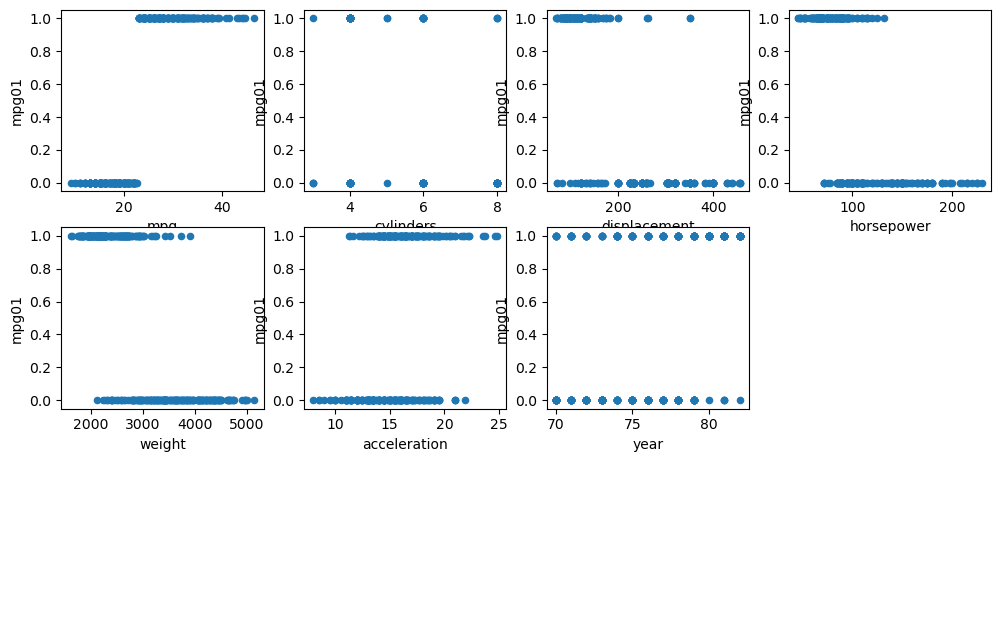

In [4]:
# plot relation of mpg01 with other features
fig, axes = subplots(3, 4, figsize=(12, 8))
for i, ax in enumerate(axes.flat):
    if i < 7:
        auto_data.plot.scatter(x=auto_data.columns[i], y='mpg01', ax=ax, legend=False)
    else:
        ax.axis('off')

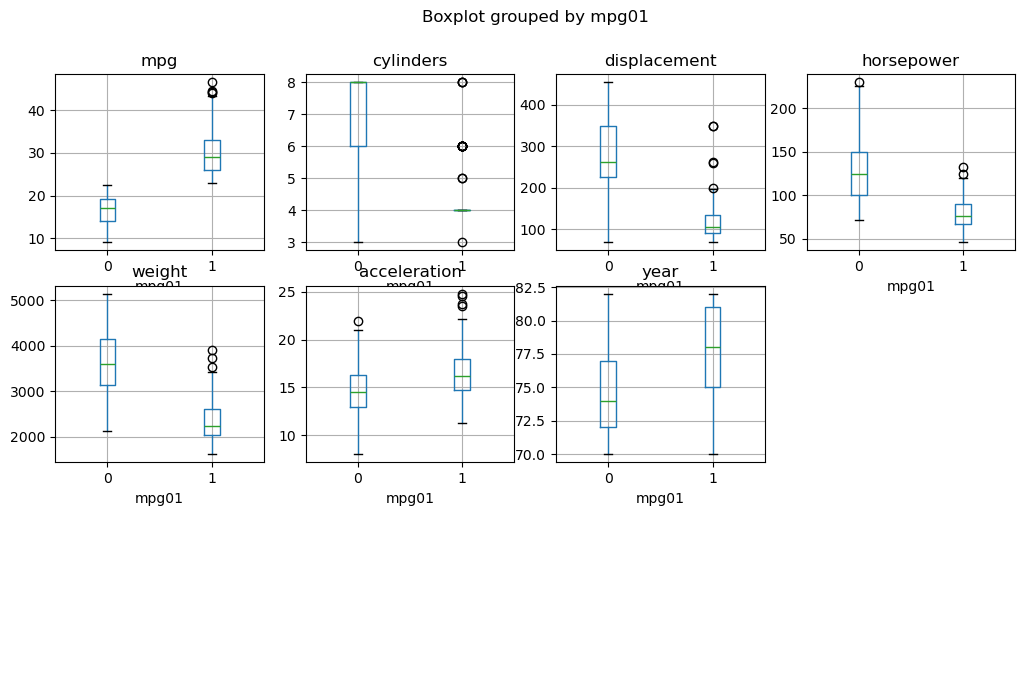

In [5]:
# boxplots
fig, axes = subplots(3, 4, figsize=(12, 8))
for i, ax in enumerate(axes.flat):
    if i < 7:
        auto_data.boxplot(column=auto_data.columns[i], by='mpg01', ax=ax)
    else:
        ax.axis('off')

As expected, mpg is the most useful feature in predicting mpg01 because it was used to create mpg01. Some other weak correlations exist between mpg01: weight, acceleration, and horsepower.

- (c) Split the data into a training set and a test set.

In [6]:
# train test split
X = auto_data.drop(['mpg', 'mpg01', 'name'], axis=1) # we have to drop mpg as well since mpg01 is derived from it
y = auto_data.mpg01
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

- (d) Perform LDA on the training data in order to predict mpg01
using the variables that seemed most associated with mpg01 in
(b). What is the test error of the model obtained?

In [13]:
# lda model using strongest correlated predictors (horsepower, weight, acceleration)
lda = LDA()
lda.fit(X_train[['horsepower', 'weight', 'acceleration']], y_train)
yhat = lda.predict(X_test[['horsepower', 'weight', 'acceleration']])
test_acc = np.mean(y_test == yhat)
test_err = 1 - test_acc
confusion_table(y_test, yhat), "Test accuracy: {:.2f}%".format(test_acc * 100), "Test error: {:.2f}%".format(test_err * 100)

(Truth       0   1
 Predicted        
 0          59  15
 1           6  77,
 'Test accuracy: 86.62%',
 'Test error: 13.38%')

- (e) Perform QDA on the training data in order to predict mpg01
using the variables that seemed most associated with mpg01 in
(b). What is the test error of the model obtained?

In [15]:
# qda model using strongest correlated predictors (horsepower, weight, acceleration)
qda = QDA()
qda.fit(X_train[['horsepower', 'weight', 'acceleration']], y_train)
yhat = qda.predict(X_test[['horsepower', 'weight', 'acceleration']])
test_acc = np.mean(y_test == yhat)
test_err = 1 - test_acc
confusion_table(y_test, yhat), "Test accuracy: {:.2f}%".format(test_acc * 100), "Test error: {:.2f}%".format(test_err * 100)

(Truth       0   1
 Predicted        
 0          61  13
 1           7  76,
 'Test accuracy: 87.26%',
 'Test error: 12.74%')

- (f) Perform logistic regression on the training data in order to pre-
dict mpg01 using the variables that seemed most associated with
mpg01 in (b). What is the test error of the model obtained?

In [16]:
# logistic regression model using strongest correlated predictors (horsepower, weight, acceleration)
lr = LogisticRegression()
lr.fit(X_train[['horsepower', 'weight', 'acceleration']], y_train)
yhat = lr.predict(X_test[['horsepower', 'weight', 'acceleration']])
test_acc = np.mean(y_test == yhat)
test_err = 1 - test_acc
confusion_table(y_test, yhat), "Test accuracy: {:.2f}%".format(test_acc * 100), "Test error: {:.2f}%".format(test_err * 100)

(Truth       0   1
 Predicted        
 0          65   9
 1          11  72,
 'Test accuracy: 87.26%',
 'Test error: 12.74%')

- (g) Perform naive Bayes on the training data in order to predict
mpg01 using the variables that seemed most associated with mpg01
in (b). What is the test error of the model obtained?

In [17]:
# naive bayes model using strongest correlated predictors (horsepower, weight, acceleration)
nb = GaussianNB()
nb.fit(X_train[['horsepower', 'weight', 'acceleration']], y_train)
yhat = nb.predict(X_test[['horsepower', 'weight', 'acceleration']])
test_acc = np.mean(y_test == yhat)
test_err = 1 - test_acc
confusion_table(y_test, yhat), "Test accuracy: {:.2f}%".format(test_acc * 100), "Test error: {:.2f}%".format(test_err * 100)

(Truth       0   1
 Predicted        
 0          61  13
 1           4  79,
 'Test accuracy: 89.17%',
 'Test error: 10.83%')

- (h) Perform KNN on the training data, with several values of K, in
order to predict mpg01. Use only the variables that seemed most
associated with mpg01 in (b). What test errors do you obtain?
Which value of K seems to perform the best on this data set?

In [19]:
# knn model using strongest correlated predictors (horsepower, weight, acceleration)
# find best k
best_k = 1
best_acc = 0
best_conf = None
best_err = 0
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train[['horsepower', 'weight', 'acceleration']], y_train)
    yhat = knn.predict(X_test[['horsepower', 'weight', 'acceleration']])
    test_acc = np.mean(y_test == yhat)
    test_err = 1 - test_acc
    if test_acc > best_acc:
        best_k = k
        best_acc = test_acc
        best_conf = confusion_table(y_test, yhat)
        best_err = test_err
best_k, best_acc, best_conf, "Test error: {:.2f}%".format(best_err * 100)

(3,
 0.8726114649681529,
 Truth       0   1
 Predicted        
 0          65   9
 1          11  72,
 'Test error: 12.74%')

### 16

Using the Boston data set, fit classification models in order to predict
whether a given suburb has a crime rate above or below the median.
Explore logistic regression, LDA, naive Bayes, and KNN models using
various subsets of the predictors. Describe your findings.

Hint: You will have to create the response variable yourself, using the
variables that are contained in the Boston data set.

In [2]:
# load boston
boston_data = load_data('Boston')
# create response variable
boston_data['crim01'] = (boston_data.crim > boston_data.crim.median()).astype(int)
boston_data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv,crim01
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4,0
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6,0
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9,0
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0,0


In [8]:
# first, we find relevant predictors using logistic regression p-values
predictors = boston_data.columns.drop(['crim', 'crim01'])
design = MS(predictors)
X = design.fit_transform(boston_data)
y = boston_data.crim01
glm = sm.GLM(y, X, family=sm.families.Binomial())
results = glm.fit()
results.summary()
# add intercept to beginning of predictors
predictors = ['Intercept'] + list(predictors)
# dataframe of predictors and their p-values rounded to 4 decimal places
pvalues = pd.DataFrame({'predictor':
                        predictors,
                        'pvalue':
                        results.pvalues}).round(4)
pvalues

,predictor,pvalue
intercept,Intercept,0.0000
zn,zn,0.0114
indus,indus,0.2207
chas,chas,0.3907
nox,nox,0.0000
rm,rm,0.6876
age,age,0.0761
dis,dis,0.0018
rad,rad,0.0000
tax,tax,0.0187


In [12]:
# list of predictors where p-value < 0.05
sig_predictors = pvalues[pvalues.pvalue < 0.05].predictor
sig_predictors.drop('intercept', inplace=True)
sig_predictors

/tmp/ipykernel_12687/338379328.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sig_predictors.drop('intercept', inplace=True)


zn              zn
nox            nox
dis            dis
rad            rad
tax            tax
ptratio    ptratio
medv          medv
Name: predictor, dtype: object

In [14]:
# permutations of predictors using significant predictors
from itertools import combinations
predictors = list(sig_predictors)
best_acc = {'LDA': 0, 'QDA': 0, 'NB': 0, 'KNN': 0, 'LR': 0}
best_models = {'LDA': None, 'QDA': None, 'NB': None, 'KNN': None, 'LR': None}
# scale data
scaler = StandardScaler()
boston_data[predictors] = scaler.fit_transform(boston_data[predictors])
# ignore warnings
import warnings
warnings.filterwarnings('ignore')
# keep half of the data for training
train = np.random.choice([True, False], size=boston_data.shape[0])
y_train = boston_data.crim01[train]
y_test = boston_data.crim01[~train]
# test every combination of predictors (from the previous significant predictors)
for n in range(1, len(predictors) + 1):
    for combo in combinations(predictors, n):
        design = MS(combo)
        X_train = design.fit_transform(boston_data[train])
        X_test = design.fit_transform(boston_data[~train])
        lda = LDA()
        lda.fit(X_train, y_train)
        yhat = lda.predict(X_test)
        acc_lda = np.mean(y_test == yhat)
        if acc_lda > best_acc['LDA']:
            best_acc['LDA'] = acc_lda
            best_models['LDA'] = (combo, acc_lda)
        qda = QDA(store_covariance=True)
        qda.fit(X_train, y_train)
        yhat = qda.predict(X_test)
        acc_qda = np.mean(y_test == yhat)
        if acc_qda > best_acc['QDA']:
            best_acc['QDA'] = acc_qda
            best_models['QDA'] = (combo, acc_qda)
        nb = GaussianNB()
        nb.fit(X_train, y_train)
        yhat = nb.predict(X_test)
        acc_nb = np.mean(y_test == yhat)
        if acc_nb > best_acc['NB']:
            best_acc['NB'] = acc_nb
            best_models['NB'] = (combo, acc_nb)
        for k in range(1, 7):
            knn = KNeighborsClassifier(n_neighbors=k)
            knn.fit(X_train, y_train)
            yhat = knn.predict(X_test)
            acc_knn = np.mean(y_test == yhat)
            if acc_knn > best_acc['KNN']:
                best_acc['KNN'] = acc_knn
                best_models['KNN'] = (combo, k, acc_knn)
        lr = LogisticRegression()
        lr.fit(X_train, y_train)
        yhat = lr.predict(X_test)
        acc_lr = np.mean(y_test == yhat)
        if acc_lr > best_acc['LR']:
            best_acc['LR'] = acc_lr
            best_models['LR'] = (combo, acc_lr)

best_acc, best_models

({'LDA': 0.8695652173913043,
  'QDA': 0.5217391304347826,
  'NB': 0.8932806324110671,
  'KNN': 0.9644268774703557,
  'LR': 0.8893280632411067},
 {'LDA': (('nox', 'ptratio', 'medv'), 0.8695652173913043),
  'QDA': (('zn',), 0.5217391304347826),
  'NB': (('zn', 'nox', 'rad', 'ptratio'), 0.8932806324110671),
  'KNN': (('zn', 'tax'), 2, 0.9644268774703557),
  'LR': (('nox', 'ptratio', 'medv'), 0.8893280632411067)})

It appears that the best model and subset of predictors is the KNN model with 2 neighbors using the predictors zn and tax.